In [1]:
# from collections import OrderedDict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
plt.style.use('ggplot')
import mpld3
import seaborn as sns
from bokeh.plotting import figure, output_file, output_notebook, show, save
from bokeh.charts import HeatMap
from bokeh.sampledata.unemployment1948 import data
output_notebook()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


BokehJS successfully loaded.

# data generation

In [2]:
incidents = pd.read_csv('./data/usc_incident.csv', sep=';', index_col=0)
incidents['report_day'] = incidents['report_time'].apply(lambda x: pd.Timestamp(pd.Timestamp(x).date()))
incidents['report_DOW'] = pd.to_datetime(incidents['report_time'])
incidents['report_DOW'] = incidents['report_DOW'].dt.dayofweek

In [6]:
DOW = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']

In [3]:
# idx=date, columns=Type, values=num
num_byDay_perType = incidents.groupby('report_day').apply(lambda x: x.groupby('incident_type')['raw_string'].agg(pd.Series.count)).reset_index(
).pivot(index='report_day', columns='incident_type', values='raw_string')

In [4]:
num_byDOW_perType = incidents.groupby('report_DOW').apply(lambda x: x.groupby('incident_type')['raw_string'].agg(pd.Series.count)).reset_index(
).pivot(index='report_DOW', columns='incident_type', values='raw_string')

# Plotting

 Number of all incidents time-series  
 dip in xmas

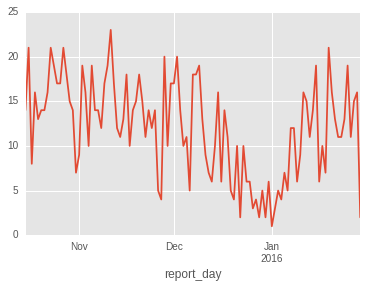

In [18]:
num_byDay = incidents.groupby('report_day')['report_time'].agg(pd.Series.count)
num_byDay.plot(x_compat=False)

In [20]:
# output_file("incidents-all.html", title="Daily number of all incidents")
p = figure(title="Daily number of all incidents", x_axis_label='Date', x_axis_type='datetime', y_axis_label='#')
p.line(num_byDay.index, num_byDay.values)
# save(p)
show(p)

Incident dist over day of week  
dip in weekend

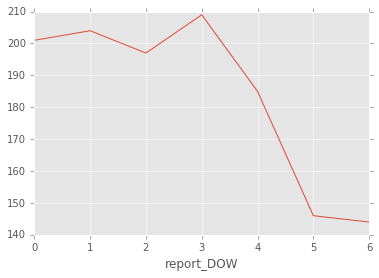

In [36]:
num_byDOW = incidents.groupby('report_DOW')['report_time'].agg(pd.Series.count)
num_byDOW.plot(x_compat=False)

# Incident types

1. SERVICE incidents many
1. Unserious types:
    1. SERVICE: 
    1. LA MUNICIPAL CODE: noise
    1. OFFICER STATUS
    1. ARSON
    1. NARCOTICS
    1. HEALTH & SAFETY

In [50]:
incidents.groupby('incident_type')['report_time'].agg(pd.Series.count).sort_values()

incident_type
HOMICIDE                    1
THEFT-ACCESS                1
OFFICER STATUS              1
FIELD INTERVIEW             1
CHILD NEGLECT               1
WEAPONS                     1
ASSAULT-OTHER               1
ARSON                       1
NARCOTICS                   2
HEALTH & SAFETY             2
DEATH                       2
DISORDERLY CONDUCT          2
LA MUNICIPAL CODE           3
EXTORTION                   3
ADMINISTRATIVE              3
ASSAULT                     3
FRAUD                       4
THEFT-GRAND AUTO            4
INCIDENT                    4
THEFT-MOTOR VEHICLE         5
THEFT-GRAND PERSON          5
SUICIDE                     5
DOMESTIC VIOLENCE           6
CRIMINAL THREATS            7
HARASSMENT                  8
ROBBERY                    10
OBSCENE ACTIVITY           10
SEX OFFENSE                12
TRESPASS                   13
EH&S                       15
IDENTITY THEFT             15
BURGLARY                   16
BATTERY                   

In [185]:
a = incidents[incidents['incident_type']!='SERVICE'].groupby('report_day')['report_time'].agg(pd.Series.count)
a

report_day
2015-10-15    10
2015-10-16    15
2015-10-17     7
2015-10-18    13
2015-10-19    10
2015-10-20    13
2015-10-21    11
2015-10-22    10
2015-10-23    19
2015-10-24    17
2015-10-25    16
2015-10-26    12
2015-10-27    15
2015-10-28    13
2015-10-29    11
2015-10-30    12
2015-10-31     5
2015-11-01     6
2015-11-02    14
2015-11-03    13
2015-11-04     7
2015-11-05    15
2015-11-06    10
2015-11-07    10
2015-11-08    12
2015-11-09    14
2015-11-10    13
2015-11-11    19
2015-11-12    11
2015-11-13     9
              ..
2015-12-31     2
2016-01-01     1
2016-01-02     3
2016-01-03     5
2016-01-04     2
2016-01-05     6
2016-01-06     4
2016-01-07    10
2016-01-08    10
2016-01-09     6
2016-01-10     9
2016-01-11    16
2016-01-12     9
2016-01-13     9
2016-01-14    14
2016-01-15    13
2016-01-16     5
2016-01-17     9
2016-01-18     7
2016-01-19    17
2016-01-20    12
2016-01-21     9
2016-01-22     6
2016-01-23     9
2016-01-24    12
2016-01-25    14
2016-01-26     5
201

In [82]:
a.iloc[1]['raw_string']

"[new_line][new_line]10/16/15  7:54 am[new_line][new_line]-[new_line][new_line]Location:[new_line][new_line]DOWNEY WY & MCCLINTOCK AV[new_line][new_line]Report #:[new_line][new_line]1504263[new_line][new_line]Occurred:[new_line]Incident:[new_line]Summary:[new_line][new_line]-[new_line][new_line]to[new_line][new_line]10/16/15  7:00 am[new_line]PROPERTY[new_line]A student's passport, USC ID and driver's license were found at the location and turned in to DPS Lost & Found.[new_line][new_line]Recovered Property Without a Crime[new_line][new_line]Disposition: CLOSED[new_line][new_line] 7:00 am[new_line][new_line]10/16/15[new_line][new_line]-[new_line][new_line]"

In [56]:
incidents['location'].unique().size

429

In [58]:
incidents[incidents['location'].notnull()].size

8785

In [61]:
incidents.groupby('location')['raw_string'].agg(pd.Series.count).sort_values()

location
CVS PHARMACY                                                  1
628 30TH ST                                                   1
637 30TH ST                                                   1
SHRINE AUDITORIUM                                             1
712 32ND ST                                                   1
721 32ND ST                                                   1
833 28TH ST                                                   1
SEVEN GABLES APARTMENTS                                       1
SENATOR APARTMENTS II                                         1
SEELEY WINTERSMITH MUDD MEMORIAL HALL  OF PHILOSOPH           1
ADAMS BL & MENLO AV                                           1
ADAMS BL & ORCHARD ST                                         1
SCENE DOCK THEATRE                                            1
ADAMS BL & TOBERMAN ST                                        1
ADAMS BL & VERMONT AV                                         1
SAN PABLO ST & ALCAZAR ST      

In [85]:
num_byDay = incidents.groupby('report_day').apply(lambda x: x.groupby('incident_type').agg(pd.Series.count))
num_byDay.plot(x_compat=False)

KeyError: 'incident_type'

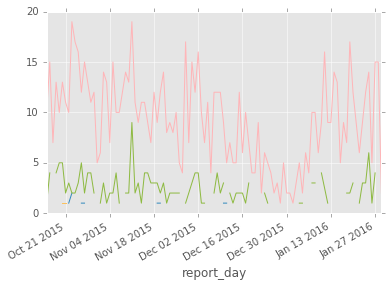

In [187]:
num_byDay_perType[num_byDay_perType.columns[34:40]].plot(legend=False)
a.plot()

In [176]:
num_byDay_perType[12:13].T

report_day,2015-10-27 00:00:00
incident_type,
ADMINISTRATIVE,NaN
ALARM RESPONSE,NaN
ALCOHOL,NaN
ARSON,NaN
ASSAULT,NaN
ASSAULT-OTHER,NaN
BATTERY,NaN
BURGLARY,NaN
BURGLARY-MOTOR VEHICLE,NaN


# Places

In [30]:
major_incidents = incidents[~(incidents['incident_type'].isin(['SERVICE', 'TRAFFIC'])) & 
                            ~(incidents['location'].isin(['KECK HOSPITAL OF USC', 'OUTSIDE USC AREA']))]

In [31]:
major_incidents.groupby('location')['raw_string'].agg(pd.Series.count).sort_values(ascending=False)

location
UNIVERSITY GATEWAY APARTMENTS                                18
THE LORENZO APARTMENTS                                       17
TROY HALL                                                    15
PARKING STRUCTURE A                                          14
MARK TAPER HALL OF HUMANITIES                                13
RONALD TUTOR CAMPUS CENTER                                   12
THOMAS & DOROTHY LEAVEY LIBRARY                              11
PERTUSATI UNIVERSITY BOOKSTORE                               10
UNIVERSITY PARKING CENTER                                    10
GENERAL WILLIAM LYON UNIVERSITY CENTER                        9
PARKING STRUCTURE D                                           9
ELISABETH VON KLEINSMID MEMORIAL  RESIDENCE HALL              9
MARIANNE & J.DOUGLAS PARDEE TOWER                             8
CECELE & MICHAEL BIRNKRANT RESIDENCE  HALL                    8
ANNENBERG HOUSE                                               8
INTERNATIONALLY THEMED RESIDENT

In [35]:
major_incidents[major_incidents['location']=='PARKING STRUCTURE A']

,report_time,location,incident_type,summary,raw_string,report_day
True,,,,,,
1504560,2015-11-02 17:13:00,PARKING STRUCTURE A,PROPERTY,to,[new_line][new_line]11/2/15[new_line][new_line...,2015-11-02
1504728,2015-11-11 22:09:00,PARKING STRUCTURE A,VEHICLE CODE,to 11/11/15,[new_line][new_line]11/11/15 10:09 pm[new_line...,2015-11-11
1504772,2015-11-14 21:45:00,PARKING STRUCTURE A,PROPERTY,to 11/14/15,[new_line][new_line]11/14/15 9:45 pm[new_line...,2015-11-14
1504778,2015-11-15 12:34:00,PARKING STRUCTURE A,PROPERTY,to,[new_line][new_line]11/15/15 12:34 pm[new_line...,2015-11-15
1504843,2015-11-19 21:16:00,PARKING STRUCTURE A,PROPERTY,PROPERTY A student reported her vehicle bumper...,[new_line][new_line]11/19/15[new_line][new_lin...,2015-11-19
1504946,2015-11-28 08:03:00,PARKING STRUCTURE A,NaN,NaN,[new_line][new_line]11/28/15 8:03 am[new_line...,2015-11-28
1504954,2015-11-28 16:09:00,PARKING STRUCTURE A,PROPERTY,to,[new_line][new_line]11/28/15 4:09 pm[new_line...,2015-11-28
1505008,2015-11-30 11:33:00,PARKING STRUCTURE A,PROPERTY,to,[new_line][new_line]11/30/15 11:33 am[new_line...,2015-11-30
1505011,2015-11-30 13:19:00,PARKING STRUCTURE A,PROPERTY,to 11/24/15,[new_line][new_line]11/30/15 1:19 pm[new_line...,2015-11-30


In [39]:
major_incidents[major_incidents['location']=='PARKING STRUCTURE A'].iloc[9]['raw_string']

"[new_line][new_line]12/2/15[new_line][new_line]-[new_line][new_line] 2:37 pm[new_line][new_line]Location:[new_line][new_line]PARKING STRUCTURE A[new_line][new_line]Report #:[new_line][new_line]1505045[new_line][new_line]Occurred:[new_line]Incident:[new_line]Summary:[new_line][new_line]-[new_line][new_line]to[new_line][new_line]12/20/15[new_line][new_line] 2:15 pm[new_line][new_line]12/2/15[new_line]PROPERTY[new_line]A student reported that the passenger side door of his vehicle was scratched when an unidentified female opened the driver's [new_line]side door of her vehicle into it.[new_line][new_line]Disposition: CLOSED[new_line][new_line]Damaged Property[new_line][new_line] 2:20 pm[new_line][new_line]-[new_line][new_line]\x0cUniversity of Southern California[new_line][new_line]Department of Public Safety[new_line][new_line]Daily Incident Log[new_line][new_line]From 12/2/2015 To 12/3/2015[new_line][new_line]"

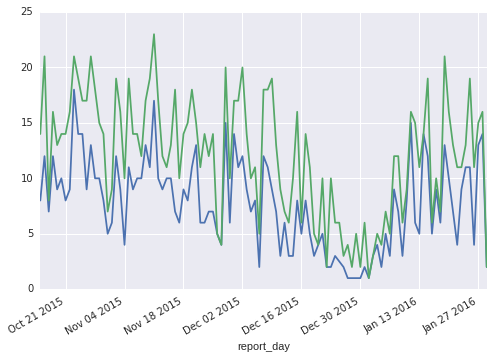

In [47]:
a = major_incidents.groupby('report_day')['report_time'].agg(pd.Series.count)
b = incidents.groupby('report_day')['report_time'].agg(pd.Series.count)
a.plot(x_compat=False)
b.plot(x_compat=False)
gcf().autofmt_xdate()

HEAT MAP

In [1]:
fig = plt.figure()
a = num_byDOW_perType[[x for x in num_byDOW_perType if 'THEFT' in x]]
# a = pd.DataFrame(np.random.rand(4,4), columns=['a', 'b', 'c', 'd'])
sns.heatmap(data=a, annot=True, xticklabels=a.columns.tolist(), yticklabels=DOW)


NameError: name 'plt' is not defined

In [8]:
print mpld3.fig_to_html(fig)



<style>

</style>

<div id="fig_el193591406077372333605787098637"></div>
<script>
function mpld3_load_lib(url, callback){
  var s = document.createElement('script');
  s.src = url;
  s.async = true;
  s.onreadystatechange = s.onload = callback;
  s.onerror = function(){console.warn("failed to load library " + url);};
  document.getElementsByTagName("head")[0].appendChild(s);
}

if(typeof(mpld3) !== "undefined" && mpld3._mpld3IsLoaded){
   // already loaded: just create the figure
   !function(mpld3){
       
       mpld3.draw_figure("fig_el193591406077372333605787098637", {"axes": [{"xlim": [0.0, 7.0], "yscale": "linear", "axesbg": "#EAEAF2", "texts": [{"v_baseline": "central", "h_anchor": "middle", "color": "#262626", "text": "4", "coordinates": "data", "zorder": 3, "alpha": 1, "fontsize": 12.0, "position": [0.5, 0.5], "rotation": -0.0, "id": "el19359140607734783312"}, {"v_baseline": "central", "h_anchor": "middle", "color": "#262626", "text": "2", "coordinates": "data", "zorder": 3

In [89]:
num_byDOW_perType[[x for x in num_byDOW_perType if 'THEFT' in x]]

incident_type,IDENTITY THEFT,THEFT-ACCESS,THEFT-GRAND,THEFT-GRAND AUTO,THEFT-GRAND PERSON,THEFT-MOTOR VEHICLE,THEFT-PETTY
report_DOW,,,,,,,
0,4,NaN,5,NaN,NaN,NaN,37
1,2,NaN,3,3,2,2,29
2,2,NaN,2,1,NaN,2,40
3,2,1,6,NaN,1,NaN,26
4,NaN,NaN,6,NaN,1,1,29
5,1,NaN,2,NaN,NaN,NaN,13
6,4,NaN,2,NaN,1,NaN,25


In [73]:
type(num_byDOW_perType)

pandas.core.frame.DataFrame